In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

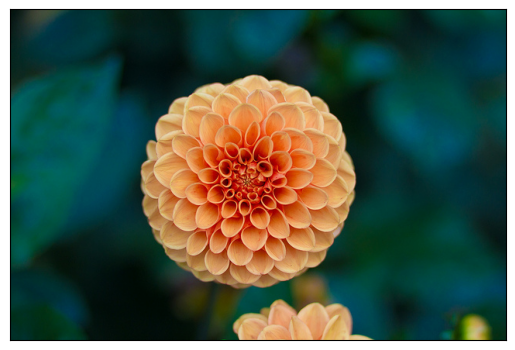

In [15]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)


In [16]:
china.shape #427pixel X 640 pixel and 3 color

(427, 640, 3)

In [17]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [18]:
data = china/255.0  # to have only 0 .... 1 
data = data.reshape(427*640,3)
data.shape 

(273280, 3)

In [19]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [20]:

def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B = data[i].T 

    fig,ax=plt.subplots(1,2,figsize=(16,6)) 
    ax[0].scatter(R,G , marker='.',color = colors)
    ax[0].set(xlabel='Red' , ylabel = 'Green' , xlim=(0,1) , ylim=(0,1)) 

    ax[1].scatter(R,B , color = colors , marker='.') 
    ax[1].set(xlabel='Red' , ylabel='Blue' , xlim=(0,1), ylim=(0,1))
    plt.show()

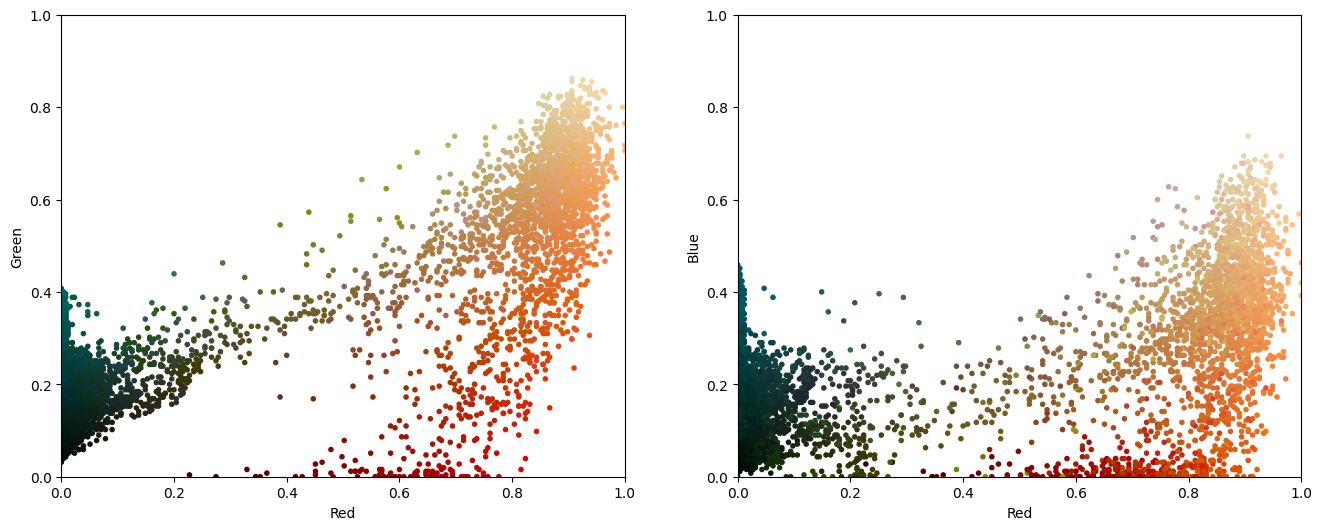

In [21]:
plot_pixels(data,title = "Input color space: 16 million possible colors") 

In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import MiniBatchKMeans

In [23]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
y_predict = kmeans.predict(data)

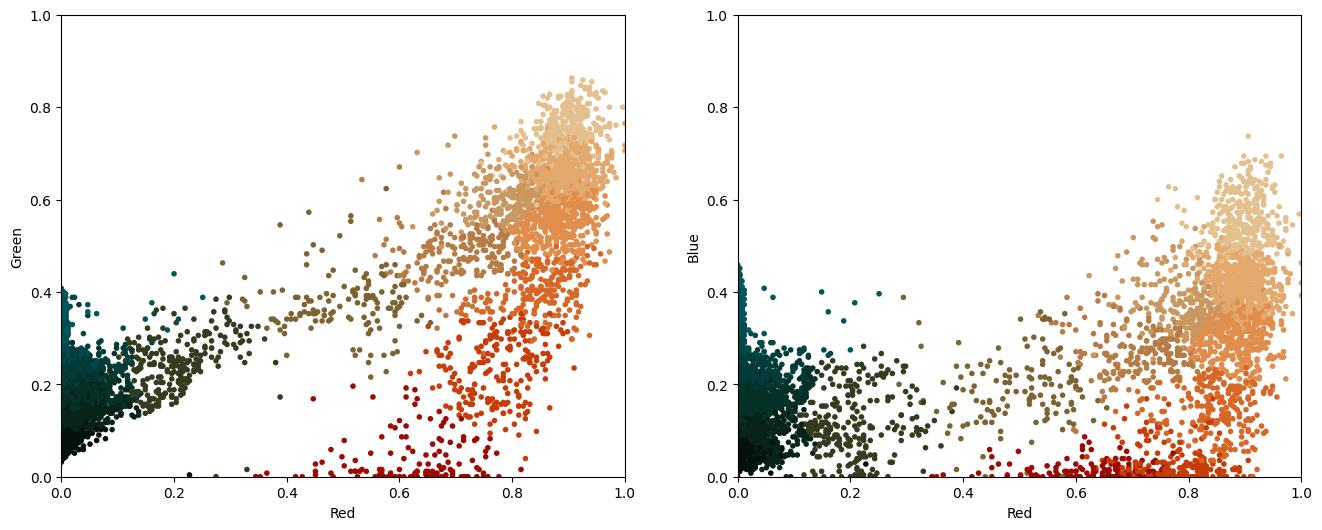

In [24]:
new_color = kmeans.cluster_centers_[y_predict]
plot_pixels(data , title="Reduced color space : 16 colors", colors=new_color)


Text(0.5, 1.0, 'rendered_image')

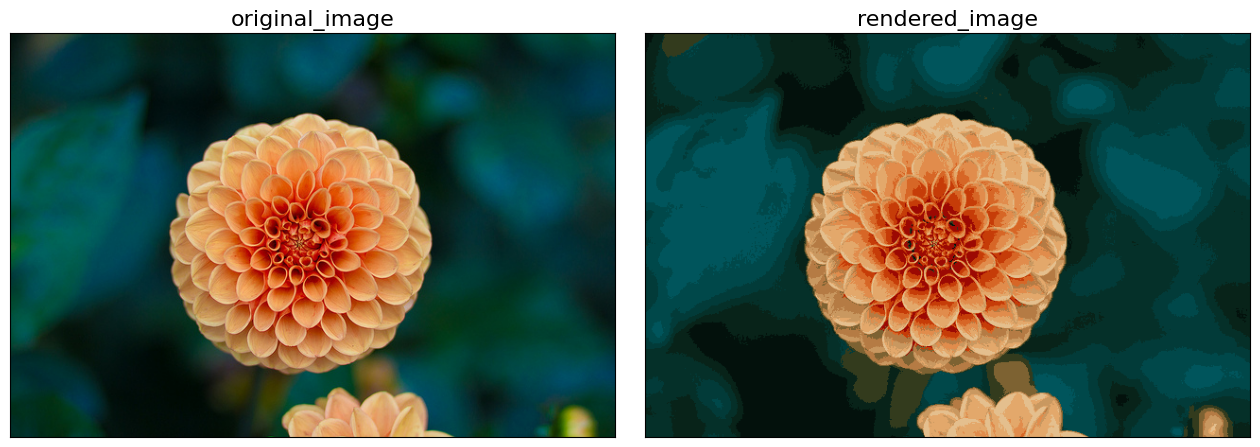

In [25]:
china_recolored = new_color.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("original_image",size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("rendered_image",size=16)